## **A simple example**

Consider trying to predict the output column given the three input columns:

||  *input*    ||*Output*|
|:---:|:---:|:---:|:---:
0|0|1|0
0|1|1|0
1|0|1|1
1|1|1|1


### **2 Layer Neural Network:**
#### Step 1: Model initialization

In [1]:
import numpy as np
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
W1 = 2*np.random.random((3,1)) - 1
print('X = \n {} \n y =\n {}'.format(X, y))
print('init weights = \n {}'.format(W1))

X = 
 [[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]] 
 y =
 [[0]
 [0]
 [1]
 [1]]
init weights = 
 [[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


#### Step 2: Forward propagation 

In [2]:
# forward propagation
l0 = X  # layer 0 (input layer)
l1 = np.dot(l0, W1)  # layer 1 (output layer)
print(l1.shape)

(4, 1)


#### Step 3: Loss value calculation
|*input*|*predicted output*|*desired output (labels)*|
|:---:|:---:|:---:|
(0, 0, 1)|-0.99977125|0|
(0, 1, 1)|-0.55912226|0|
(1, 0, 1)|-1.16572724|1|
(1, 1, 1)|-0.72507825|1|

In [3]:
### Calculate the loss value by defining a loss function to be the sum of squares
import pandas as pd

abs_err = np.absolute(np.diff([l1, y], axis=0))
square_err = np.square(np.diff([l1, y], axis = 0))
err_matrix = np.concatenate((l1, y, abs_err[0], square_err[0]), axis = 1)
L0 = [str(x) for x in l0]
err_table = pd.DataFrame(err_matrix, columns=['Predict','Desired ouput (label)', 'Abs error', 'Square err'], index = L0)

print(err_table)


          Predict  Desired ouput (label)  Abs error  Square err
[0 0 1] -0.999771                    0.0   0.999771    0.999543
[0 1 1] -0.559122                    0.0   0.559122    0.312618
[1 0 1] -1.165727                    1.0   2.165727    4.690374
[1 1 1] -0.725078                    1.0   1.725078    2.975895


#### Steps 4 and 5: Differentialtion and Back propagation
The loss function used in the current problem is squared error, which is:  **(l1 - y)<sup>2</sup>**<br>
Now write the code to express the derivative of the loss function

In [4]:
# forward propagation
l0 = X  # layer 0 (input layer)
W1 = 2*np.random.random((3,1)) - 1
for iter in range(10000):
    l1 = np.dot(l0, W1)  # layer 1 (output layer)

    #loss = (l1 - y)**2
    # the derivative of loss w.r.t. W1 is: 2*(l1 - y)*l0
    dW1 = np.dot(l0.T, 2*(l1 - y))
    # back propagation
    W1 -= 0.1*dW1

print('prediction:\n', l1)

prediction:
 [[7.0366248e-17]
 [7.8184720e-17]
 [1.0000000e+00]
 [1.0000000e+00]]


## **A slightly harder example**
Now, the example is slightly different from the previous one:

||  *input*    ||*Output*|
|:---:|:---:|:---:|:---:
0|0|1|0
0|1|1|1
1|0|1|1
1|1|1|0

In [0]:
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# output dataset            
y = np.array([[0,1,1,0]]).T

#### Does the previous approach work?

In [6]:
# forward propagation
l0 = X  # layer 0 (input layer)
W1 = 2*np.random.random((3,1)) - 1
for iter in range(10000):
    l1 = np.dot(l0, W1)  # layer 1 (output layer)

    #loss = (l1 - y)**2
    # the derivative of loss w.r.t. W1 is: 2*(l1 - y)*l0
    dW1 = np.dot(l0.T, 2*(l1 - y))
    # back propagation
    W1 -= 0.1*dW1

print('prediction:\n', l1)

prediction:
 [[0.5]
 [0.5]
 [0.5]
 [0.5]]


#### If adding another layer, does it work?

In [7]:
l0 = X  # layer 0 (input layer)
# randomly initialize our weights with mean 0
W1 = 2*np.random.random((3,4)) - 1
W2 = 2*np.random.random((4,1)) - 1

for iter in range(10000):
    l1 = np.dot(l0, W1)  #layer 1
    l2 = np.dot(l1, W2)  #layer 2  (output layer)
    #loss = (l2 - y)**2
    # the derivative of loss w.r.t. W2 is: 2*(l2 - y)*l1
    dW2 = np.dot(l1.T, 2*(l2 - y))
    # the derivative of loss w.r.t. W1 is: 2*(l2 - y)*W2*l0
    dW1 = np.dot(l0.T, np.dot(2*(l2 - y), W2.T))
    # back propagation
    W2 -= 0.01*dW2
    W1 -= 0.01*dW1

print("Output After Training:")
print( l2)


Output After Training:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


#### Step 5A: nonlinear active function

In [8]:
# sigmoid function
def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

l0 = X  # layer 0 (input layer)
# randomly initialize our weights with mean 0
W1 = 2*np.random.random((3,4)) - 1
W2 = 2*np.random.random((4,1)) - 1

l2_error = []
for iter in range(10000):
    # forward propagation
    l0 = X
    z1 = np.dot(l0, W1)
    l1 = sigmoid(z1)

    z2 = np.dot(l1, W2)  
    l2 = sigmoid(z2)
    
    # how much did we miss?
    l2_error.append((l2 - y)**2)
    
    l2_delta = 2*(l2 - y)*sigmoid(l2, True)

    l1_error = np.dot(l2_delta, W2.T)
    l1_delta = l1_error*sigmoid(l1,True) 
    # update weights
    W2 -= np.dot(l1.T,l2_delta)
    W1 -= np.dot(l0.T, l1_delta)

print("Output After Training:")
print (l2)

Output After Training:
[[0.0068702 ]
 [0.99374761]
 [0.99358811]
 [0.00736315]]


## **Image Classification**
The problem of Image Classification goes like this: Given a set of images that are all labeled with a single category, we are asked to predict these categories for a novel set of test images and measure the accuracy of the predictions. There are a variety of challenges associated with this task, including viewpoint variation, scale variation, intra-class variation, image deformation, image occlusion, illumination conditions, background clutter etc.
How might we go about writing an algorithm that can classify images into distinct categories? Computer Vision researchers have come up with a data-driven approach to solve this. Instead of trying to specify what every one of the image categories of interest look like directly in code, they provide the computer with many examples of each image class and then develop learning algorithms that look at these examples and learn about the visual appearance of each class. In other words, they first accumulate a training dataset of labeled images, then feed it to the computer in order for it to get familiar with the data.

Given that fact, the complete image classification pipeline can be formalized as follows:
Our input is a training dataset that consists of N images, each labeled with one of K different classes.
Then, we use this training set to train a classifier to learn what every one of the classes looks like.
In the end, we evaluate the quality of the classifier by asking it to predict labels for a new set of images that it has never seen before. We will then compare the true labels of these images to the ones predicted by the classifier.

 ## **MNIST Dataset**
The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

MNIST dataset is widely used for “classification”, “image recognition” task. It is also often used to compare algorithm performances in research.

In [9]:
#%tensorflow_version 2.x
import keras
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

Using TensorFlow backend.


(60000, 28, 28)


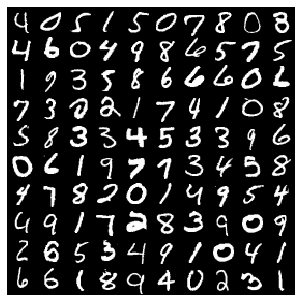

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
 
ROW, COLUMN = 10, 10
plt.figure(figsize=(4,4))
for i in range(ROW * COLUMN):
    n = np.random.randint(0, 60000)
    image = X_train[n,:,:]  # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 10, height 10)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    plt.axis('off')  # do not show axis value
plt.tight_layout(pad=0.)   # automatic padding between subplots

plt.show()

## **Fashion-MNIST**

Fasion-MNIST is mnist like data set. You can think this as the fashion version of mnist. It is written that because mnist is too easy for classification and used too much, this data set was made. You can check the page to read the document of Fashion-MNIST. 

#### **Fashion-MNIST database of fashion articles**

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:

Label |	Description
:---: | ---
0 |	T-shirt/top
1 |	Trouser
2 |	Pullover
3 |	Dress
4 |	Coat
5 |	Sandal
6 |	Shirt
7 |	Sneaker
8 |	Bag
9 |	Ankle boot



In [11]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


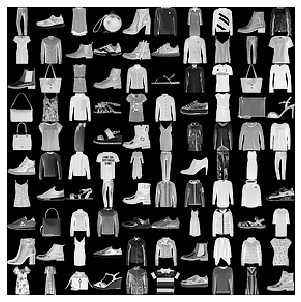

In [12]:
ROW, COLUMN = 10, 10
plt.figure(figsize=(4,4))
for i in range(ROW * COLUMN):
    n = np.random.randint(0, 60000)
    image = X_train[n,:,:]  # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 10, height 10)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    plt.axis('off')  # do not show axis value
plt.tight_layout(pad=0.)   # automatic padding between subplots

plt.show()

## **Training CNN Models on Fashion MNIST**

In [13]:
#############################################
# Here’s the code to load and split the data:
#############################################
# Import libraries
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# X forms the training images, and y forms the training labels
y = to_categorical(np.array(Y_train))

# Here I split original training data to sub-training (80%) and validation data (20%)
x_train, x_val, y_train, y_val = train_test_split(X_train, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
x_test = X_test
y_test = to_categorical(np.array(Y_test))

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, X_test.shape, y_test.shape)

(48000, 28, 28) (48000, 10) (12000, 28, 28) (12000, 10) (10000, 28, 28) (10000, 10)


After loading and splitting the data, preprocess them by reshaping them into the shape the network expects and scaling them so that all values are in the [0, 1] interval.<br> 
Previously, for instance, the training data were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. Transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.


In [0]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train /= 255

# Prepare the test images
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test /= 255

# Prepare the validation images
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_val = x_val.astype('float32')
x_val /= 255

### CNN with 1 Convolutional Layer


In [15]:
'''
This CNN takes as input tensors of shape (image_height, image_width, image_channels). 
In this case, I configure the CNN to process inputs of size (28, 28, 1), which is the format of the FashionMNIST images. 
I do this by passing the argument input_shape=(28, 28, 1) to the first layer.

The 1st layer is a Conv2D layer for the convolution operation that extracts features from the input images 
by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.
The 2nd layer is a MaxPooling2D layer for the max-pooling operation that reduces the dimensionality of each feature, 
which helps shorten training time and reduce number of parameters. Here I choose the pooling window with size 2 x 2.
To combat overfititng, I add a Dropout layer as the 3rd layer, a powerful regularization technique. 
Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data 
by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 20% of the neurons.
The next step is to feed the last output tensor into a stack of Dense layers, otherwise known as fully-connected layers. 
These densely connected classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. 
Thus, I need to flatten the 3D outputs to 1D, and then add 2 Dense layers on top.
I do a 10-way classification (as there are 10 classes of fashion images), using a final layer with 10 outputs and a softmax activation. 
Softmax activation enables me to calculate the output based on the probabilities. 
Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.
'''
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### CNN with 4 Convolutional Layers

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
'''
When compiling the model, choose categorical_crossentropy as the loss function 
(which is relevent for multiclass, single-label classification problem) and Adam optimizer.

The cross-entropy loss calculates the error rate between the predicted value and the original value. 
Categorical is used because there are 10 classes to predict from. If there were 2 classes, use binary_crossentropy.
The optimizer is responsible for updating the weights of the neurons via backpropagation. 
It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight. That is how a neural network learns.
'''
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [17]:
## display the architecture of this simple CNN model:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

#### **CNN1**
* 693,962 parameters are available to be trained.
* The output of the Conv2D and MaxPooling2D layers are 3D tensors of shape (height, width, channels).
* The number of channels is controlled by the 1st argument passed to the Conv2D layer (32).
* The (13, 13, 32) outputs from Dropout layer are flattened into vectors of shape (5408,) before going through 2 Dense layers.

#### **CNN4**
* 1,219,754 parameters are available to be trained.
* The output of the Conv2D and MaxPooling2D layers are 3D tensors of shape (height, width, channels).
* The number of channels is controlled by the 1st argument passed to the Conv2D layer (32).
* The (4, 4, 128) outputs from the 3rd Dropout layer are flattened into vectors of shape (2048,) before going through 3 Dense layers.

###Training the Model
As previously mentioned, train the model with batch size of 256 and 10 epochs on both training and validation data.

In [18]:
history1 = cnn1.fit(x_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 4s 88us/step - loss: 0.5260 - acc: 0.8169 - val_loss: 0.4132 - val_acc: 0.8520
Epoch 2/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.3459 - acc: 0.8779 - val_loss: 0.3342 - val_acc: 0.8816
Epoch 3/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.3053 - acc: 0.8919 - val_loss: 0.3137 - val_acc: 0.8903
Epoch 4/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.2806 - acc: 0.8995 - val_loss: 0.3013 - val_acc: 0.8962
Epoch 5/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.2590 - acc: 0.9075 - val_loss: 0.2771 - val_acc: 0.9036
Epoch 6/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.2413 - acc: 0.9123 - val_loss: 0.2737 - val_acc: 0.9028
Epoch 7/10
48000/48000 [==

In [19]:
score1 = cnn1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.25711388128995893
Test accuracy: 0.9082


##**Data Augmentation**
Overfitting can be caused by having too few samples to learn from, making a model not generalized to new data. 

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, the model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.

In [0]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=256)
val_batches = gen.flow(x_val, y_val, batch_size=256)

In [21]:
# let's train the model using data augmentation
history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

Epoch 1/50
187/187 [==============================] - 19s 100ms/step - loss: 0.4607 - acc: 0.8251 - val_loss: 0.4258 - val_acc: 0.8417
Epoch 2/50
187/187 [==============================] - 19s 102ms/step - loss: 0.4045 - acc: 0.8484 - val_loss: 0.3969 - val_acc: 0.8551
Epoch 3/50
187/187 [==============================] - 19s 101ms/step - loss: 0.3839 - acc: 0.8558 - val_loss: 0.3784 - val_acc: 0.8615
Epoch 4/50
187/187 [==============================] - 19s 100ms/step - loss: 0.3672 - acc: 0.8636 - val_loss: 0.3603 - val_acc: 0.8663
Epoch 5/50
187/187 [==============================] - 19s 99ms/step - loss: 0.3580 - acc: 0.8651 - val_loss: 0.3487 - val_acc: 0.8738
Epoch 6/50
187/187 [==============================] - 19s 99ms/step - loss: 0.3475 - acc: 0.8685 - val_loss: 0.3493 - val_acc: 0.8725
Epoch 7/50
187/187 [==============================] - 18s 97ms/step - loss: 0.3404 - acc: 0.8728 - val_loss: 0.3372 - val_acc: 0.8783
Epoch 8/50
187/187 [==============================] - 18s 

In [22]:
score1 = cnn1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.25651930851638316
Test accuracy: 0.9143


### Results
Let's plot training and validation accuracy as well as training and validation loss.

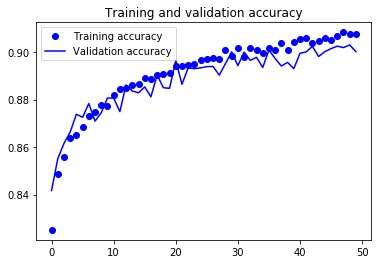

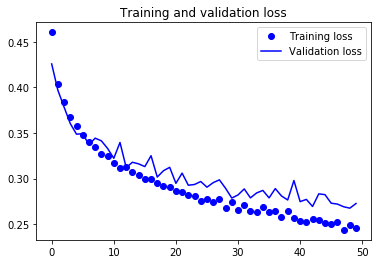

In [23]:
#import matplotlib.pyplot as plt
#%matplotlib inline

accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### **Classification Report**
Summarize the performance of my classifier as follows:

In [0]:
# get the predictions for the test data
predicted_classes = cnn1.predict_classes(x_test)

# get the indices to be plotted
y_true = Y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [28]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.87      0.87      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.92      0.81      0.86      1000
     Class 3       0.92      0.93      0.92      1000
     Class 4       0.86      0.85      0.86      1000
     Class 5       0.98      0.99      0.99      1000
     Class 6       0.72      0.80      0.76      1000
     Class 7       0.94      0.98      0.96      1000
     Class 8       0.98      0.99      0.98      1000
     Class 9       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

